In [1]:
#imports
import os
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
#from fastdtw  import fastdtw

In [2]:
data_path = os.getcwd()+"/data/fri-tilen1.csv"
data_path = os.getcwd()+"/server-data/records/matej/matejj.raw.csv"

print("Loading data from:",data_path)
data = pd.read_csv(data_path,sep=",",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",data.shape, "")
print("")

#prikaz podatkov v datoteki
data

Loading data from: /home/ziga/Desktop/PyGaitLast/server-data/records/matej/matejj.raw.csv
Done. Loaded data frame (rows, columns): (3722, 5) 



,timestamp,accX,accY,accZ,username
0,1579000723637,-2.375046,-2.624039,8.427597,matejj
1,1579000723653,-2.145203,-2.394196,8.236053,matejj
2,1579000723669,-1.838745,-1.972824,7.814682,matejj
3,1579000723685,-1.704666,-1.991974,8.216904,matejj
4,1579000723701,-2.049438,-1.991974,8.350983,matejj
...,...,...,...,...,...
3717,1579000784020,-1.340759,-3.141190,-0.536301,matejj
3718,1579000784036,-2.011124,-2.604889,-0.938522,matejj
3719,1579000784052,0.172379,-6.014236,0.766144,matejj
3720,1579000784068,-0.038315,-10.726028,1.704666,matejj


In [3]:
data_path = os.getcwd()+"/data/fri-tilen2-fix2.csv"
print("Loading data from:",data_path)
t_data = pd.read_csv(data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",t_data.shape, "")
print("")

#prikaz podatkov v datoteki
t_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/fri-tilen2-fix2.csv
Done. Loaded data frame (rows, columns): (3795, 5) 



,username,timestamp,accX,accY,accZ
1,fri-tilen2,2.153690e+15,2.355896,-16.050735,9.251190
2,fri-tilen2,2.153690e+15,1.570602,-13.215988,10.975021
3,fri-tilen2,2.153690e+15,2.336746,-8.255203,7.182602
4,fri-tilen2,2.153690e+15,2.719818,-8.427597,2.068588
5,fri-tilen2,2.153690e+15,0.632065,-15.476120,2.375046
...,...,...,...,...,...
3791,fri-tilen2,2.153750e+15,-0.823608,2.164352,11.530472
3792,fri-tilen2,2.153750e+15,0.095764,2.451660,12.239166
3793,fri-tilen2,2.153750e+15,0.670380,2.987961,11.664551
3794,fri-tilen2,2.153750e+15,-0.095764,3.007111,9.519348


In [4]:
z_data_path = os.getcwd()+"/data/ziga2.csv"
print("Loading data from:", data_path)
z_data = pd.read_csv(z_data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",z_data.shape, "")
print("")

#prikaz podatkov v datoteki
z_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/fri-tilen2-fix2.csv
Done. Loaded data frame (rows, columns): (878, 5) 



,timestamp,accX,accY,accZ,username
1,2159339604606949,-7.814682,-16.261414,-8.983047,ziga2
2,2159339621391617,-4.424484,-12.871231,-7.489059,ziga2
3,2159339635643326,-2.451660,-9.097961,-5.803543,ziga2
4,2159339649925552,-0.459686,-5.726929,-4.616028,ziga2
5,2159339664207779,1.225830,-3.658340,-3.026276,ziga2
...,...,...,...,...,...
874,2159353424281892,-5.918472,-13.043610,-2.049438,ziga2
875,2159353440151032,-7.010223,-13.541611,-0.574615,ziga2
876,2159353456020173,-6.301544,-12.507309,-0.574615,ziga2
877,2159353471889313,-3.505112,-10.840942,-2.528275,ziga2


In [5]:
#preveri nove podatke
x_data_path = os.getcwd()+"/data/n5_r_u0_0-fri.csv"
print("Loading data from:",x_data_path)
x_data = pd.read_csv(x_data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",x_data.shape, "")
print("")

#prikaz podatkov v datoteki
x_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/n5_r_u0_0-fri.csv
Done. Loaded data frame (rows, columns): (3807, 5) 



,timestamp,accX,accY,accZ,username
1,1574275395255,-2.604889,-6.895294,3.256119,testz
2,1574275395271,-0.689529,-8.772354,0.076614,testz
3,1574275395286,1.551437,-10.170563,-0.900223,testz
4,1574275395302,1.915359,-10.860092,-0.019150,testz
5,1574275395319,1.072601,-11.070786,1.091751,testz
...,...,...,...,...,...
3803,1574275455552,1.915359,-11.224014,-1.130066,testz
3804,1574275455567,1.896210,-12.124237,-1.532288,testz
3805,1574275455584,1.551437,-12.162552,-2.106903,testz
3806,1574275455599,0.708679,-11.817780,-2.719818,testz


In [6]:
#preveri nove podatke
z_fax_data_path = os.getcwd()+"/data/ziga_fix_po_faksu.csv"
print("Loading data from:",z_fax_data_path)
z_fax_data = pd.read_csv(z_fax_data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",z_fax_data.shape, "")
print("")

#prikaz podatkov v datoteki
z_fax_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/ziga_fix_po_faksu.csv
Done. Loaded data frame (rows, columns): (2991, 5) 



,timestamp,accX,accY,accZ,username
1,11776051,1.388637,2.442086,0.181959,ziga_fix_po_faksu
2,11776071,0.967257,2.595315,1.005565,ziga_fix_po_faksu
3,11776091,0.469264,3.112462,2.116474,ziga_fix_po_faksu
4,11776111,-0.038307,4.721366,3.801992,ziga_fix_po_faksu
5,11776131,-1.340753,9.385271,7.431602,ziga_fix_po_faksu
...,...,...,...,...,...
2987,11835772,-1.331176,11.568783,-0.143652,ziga_fix_po_faksu
2988,11835792,-2.968810,11.080365,0.507571,ziga_fix_po_faksu
2989,11835812,-3.581726,10.400413,0.545878,ziga_fix_po_faksu
2990,11835832,-3.371036,10.055647,-0.105345,ziga_fix_po_faksu


In [7]:
#preveri nove podatke
tilen_fix_data_path = os.getcwd()+"/data/tilen-fix.csv"
print("Loading data from:", tilen_fix_data_path)
tilen_fix_data = pd.read_csv(tilen_fix_data_path,sep=";",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",tilen_fix_data.shape, "")
print("")

#prikaz podatkov v datoteki
tilen_fix_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/tilen-fix.csv
Done. Loaded data frame (rows, columns): (3000, 5) 



,timestamp,accX,accY,accZ,username
1,13147751,-1.934515,4.223372,6.426037,tilen-fix
2,13147771,-2.604892,2.221819,8.034941,tilen-fix
3,13147791,-2.681506,0.861913,8.532935,tilen-fix
4,13147811,-2.643199,0.469264,8.667010,tilen-fix
5,13147831,-2.767697,0.430956,8.647857,tilen-fix
...,...,...,...,...,...
2996,13207651,-2.231396,-7.517793,0.574608,tilen-fix
2997,13207671,1.522712,-6.014235,0.670376,tilen-fix
2998,13207691,1.848324,-6.157887,0.679953,tilen-fix
2999,13207711,1.015141,-8.245630,-0.105345,tilen-fix


In [8]:
#preveri nove podatke
simon_data_path = os.getcwd()+"/server-data/records/simon/siht_simon_faster.raw.csv"
print("Loading data from:", simon_data_path)
simon_data = pd.read_csv(simon_data_path,sep=",",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",simon_data.shape, "")
print("")

#prikaz podatkov v datoteki
simon_data

Loading data from: /home/ziga/Desktop/PyGaitLast/server-data/records/simon/siht_simon_faster.raw.csv
Done. Loaded data frame (rows, columns): (3000, 5) 



,timestamp,accX,accY,accZ,username
0,30925092,1.541866,6.148310,2.987964,siht_simon_faster
1,30925112,1.742979,6.943185,1.982399,siht_simon_faster
2,30925132,2.030283,7.029376,1.551443,siht_simon_faster
3,30925152,2.221819,6.789956,1.379060,siht_simon_faster
4,30925172,2.298434,6.560112,1.197101,siht_simon_faster
...,...,...,...,...,...
2995,30984993,1.254562,8.925584,-1.742979,siht_simon_faster
2996,30985013,1.063026,8.322245,-1.656788,siht_simon_faster
2997,30985033,0.900220,7.872135,-1.886631,siht_simon_faster
2998,30985053,1.206678,7.738060,-2.164358,siht_simon_faster


In [13]:
#preveri nove podatke
andrej_data_path = os.getcwd()+"/data/andrej.raw.csv"
print("Loading data from:", andrej_data_path)
andrej_data = pd.read_csv(andrej_data_path,sep=",",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",simon_data.shape, "")
print("")

#prikaz podatkov v datoteki
andrej_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/andrej.raw.csv
Done. Loaded data frame (rows, columns): (3000, 5) 



,timestamp,accX,accY,accZ,username
0,364240614,-1.436521,-6.272809,3.418920,andrej
1,364240634,-1.867477,-7.546524,3.064578,andrej
2,364240653,-1.484405,-8.494628,2.394202,andrej
3,364240674,-0.871489,-9.481039,1.561020,andrej
4,364240694,-0.622492,-10.266336,0.201113,andrej
...,...,...,...,...,...
2995,364300513,1.244985,-9.825804,0.986411,andrej
2996,364300533,1.599327,-10.477027,-0.095768,andrej
2997,364300554,2.911349,-10.639832,0.995988,andrej
2998,364300574,3.936068,-11.204864,2.202666,andrej


In [43]:
#preveri nove podatke
anze_data_path = os.getcwd()+"/data/Anze.raw.csv"
print("Loading data from:", anze_data_path)
anze_data = pd.read_csv(anze_data_path,sep=",",header=0,index_col=0)
print("Done. Loaded data frame (rows, columns):",anze_data.shape, "")
print("")

#prikaz podatkov v datoteki
anze_data

Loading data from: /home/ziga/Desktop/PyGaitLast/data/Anze.raw.csv
Done. Loaded data frame (rows, columns): (2991, 5) 



,timestamp,accX,accY,accZ,username
0,256775649,2.499547,-10.563218,-0.124498,Anze
1,256775669,2.470816,-10.496181,-0.766145,Anze
2,256775689,1.762132,-9.844957,-1.101333,Anze
3,256775709,1.110910,-9.021352,-1.091756,Anze
4,256775729,0.938527,-8.149862,-0.823605,Anze
...,...,...,...,...,...
2986,256835369,3.284845,-11.990162,0.995988,Anze
2987,256835389,4.740520,-11.664551,0.909797,Anze
2988,256835409,5.583278,-11.568783,0.086191,Anze
2989,256835429,3.658340,-11.099519,-1.101333,Anze


In [9]:
def simple_one_signal_plot(data, sample_length,label_text, title_text):
    plt.figure(figsize = (15,5))
    plt.plot(data[:sample_length], label = label_text)
    plt.legend()
    plt.title(title_text)
    plt.show()
    
    
def display_multiple_signals_plot(data, labels, sample_length, title):
    plt.figure(figsize = (15,5))
    for index in range (0, len(data)):
        plt.plot(data[index][:sample_length], label = labels[index])
    plt.legend()
    plt.title(title)
    plt.show()
    
def display_signal_with_peaks(data, peaks, sample_length, label, title):
    plt.figure(figsize = (15,5))
    plt.plot(data[:sample_length], label = label)
    if len(peaks) > 0:
        plt.vlines(peaks[0], 0, 25, color='C1', label = "peak")
    else:
        print("no peaks found")
    for peak in range (1, len(peaks)):
        if(peaks[peak] >= sample_length):
            break
        plt.vlines(peaks[peak], 0, 25, color='C1')
    plt.legend()
    plt.title(title)
    plt.show()

In [10]:
def low_pass_filter(data, num_of_signals):
    fs = 63  # Sampling frequency
    fc = 4  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    n = 5 #The order of the filter.
    b, a = signal.butter(n, w, 'low') #Numerator (b) and denominator (a) polynomials of the IIR filter
    return signal.filtfilt(b, a, data[:num_of_signals])

In [11]:
def magnitude(data, num_of_signals):
    result = [0] * num_of_signals
    for i in range(1, num_of_signals):
        result[i -1] = math.sqrt(data["accX"][i] * data["accX"][i] + data["accY"][i] * data["accY"][i] + data["accZ"][i] * data["accZ"][i])
    return result

In [45]:
def low_pass_magnitude(data, num_of_signals):
    result = [0] * num_of_signals
    data_x = low_pass_filter(data["accX"], num_of_signals)
    data_y = low_pass_filter(data["accY"], num_of_signals)
    data_z = low_pass_filter(data["accZ"], num_of_signals)
    for i in range(1, num_of_signals):
        result[i -1] = math.sqrt(data_x[i] * data_x[i] + data_y[i] * data_y[i] + data_z[i] * data_z[i])
    return result

In [28]:
def find_peaks_in_signal(data, num_of_signals):
    low_pass_magnitude = low_pass_filter(magnitude(data, data.shape[0]), data_length)
    mean = calculate_mean(low_pass_magnitude)

    low_pass_magnitude = -(low_pass_magnitude - mean) 
    min = np.amin(low_pass_magnitude)

    low_pass_magnitude = low_pass_magnitude - min
    low_pass_magnitude = low_pass_magnitude * low_pass_magnitude
    
    min_peak = np.percentile(low_pass_magnitude, 89)
    return signal.find_peaks(low_pass_magnitude, min_peak, distance=25)

# Low pass filter over magnitude on data (Tilen) and z_data (ziga)

#### Original signals

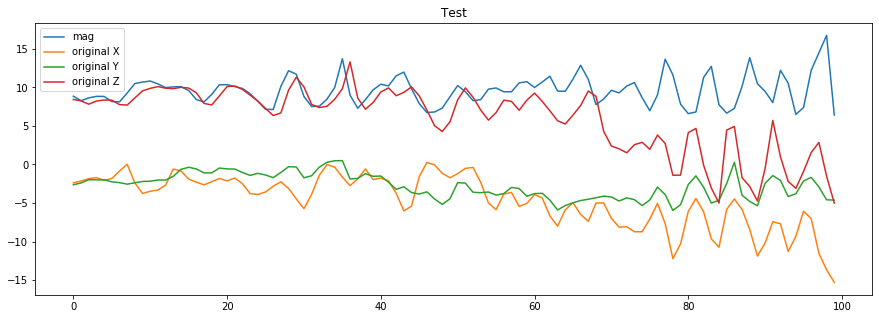

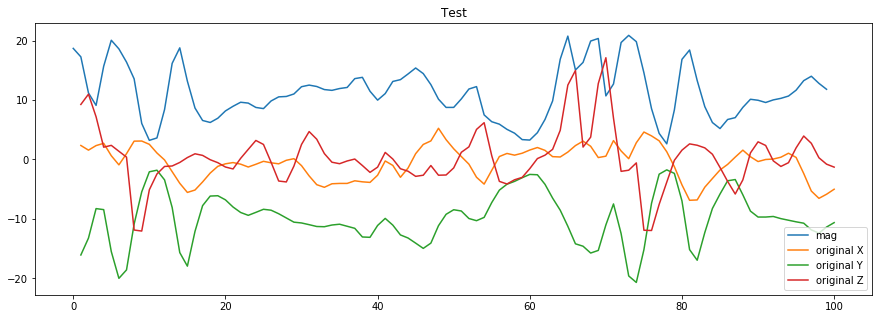

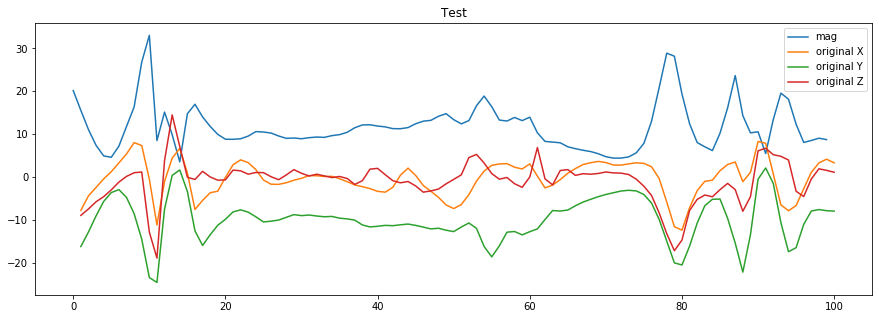

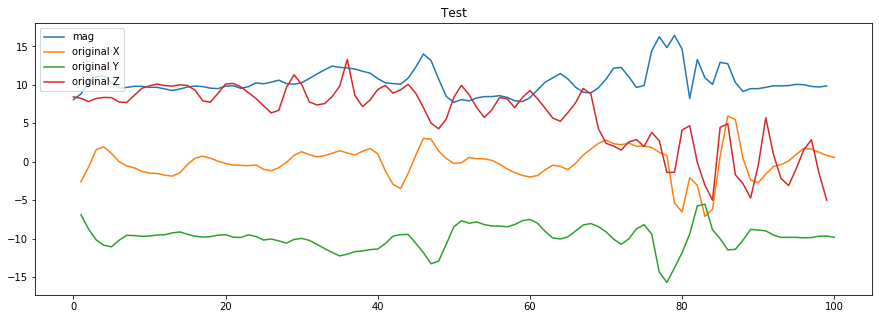

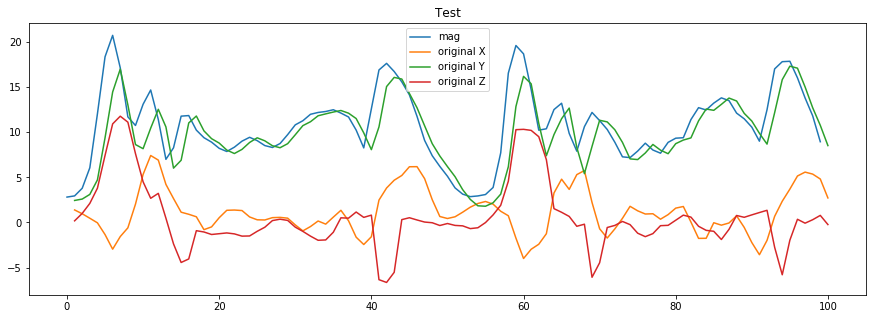

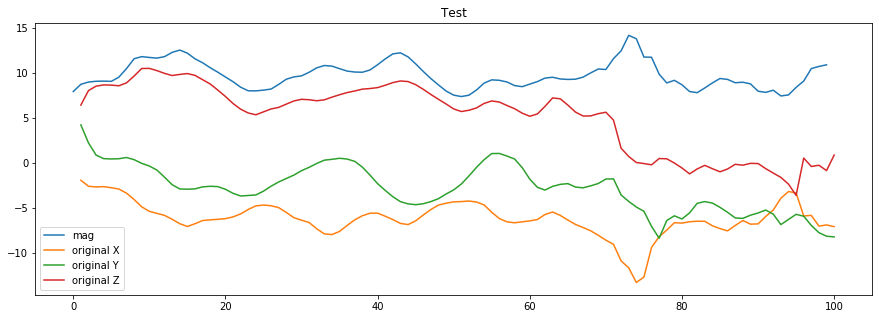

In [14]:
data_length = 100
display_multiple_signals_plot([magnitude(data, data.shape[0]), data["accX"], data["accY"], data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")
display_multiple_signals_plot([magnitude(t_data, t_data.shape[0]), t_data["accX"], t_data["accY"], t_data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")
display_multiple_signals_plot([magnitude(z_data, z_data.shape[0]), z_data["accX"], z_data["accY"], z_data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")
display_multiple_signals_plot([magnitude(x_data, x_data.shape[0]), x_data["accX"], x_data["accY"], data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")
display_multiple_signals_plot([magnitude(z_fax_data, z_fax_data.shape[0]), z_fax_data["accX"], z_fax_data["accY"], z_fax_data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")
display_multiple_signals_plot([magnitude(tilen_fix_data, tilen_fix_data.shape[0]), tilen_fix_data["accX"], tilen_fix_data["accY"], tilen_fix_data["accZ"]], ["mag", "original X", "original Y", "original Z"], data_length, "Test")

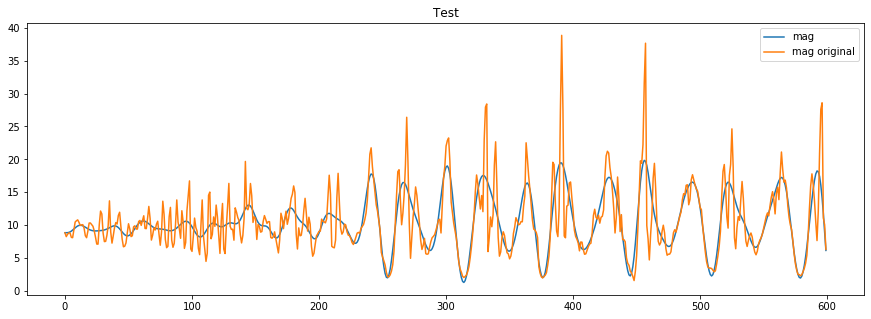

In [15]:
data_length = 600
display_multiple_signals_plot([low_pass_filter(magnitude(data, data.shape[0]), data_length), magnitude(data, data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

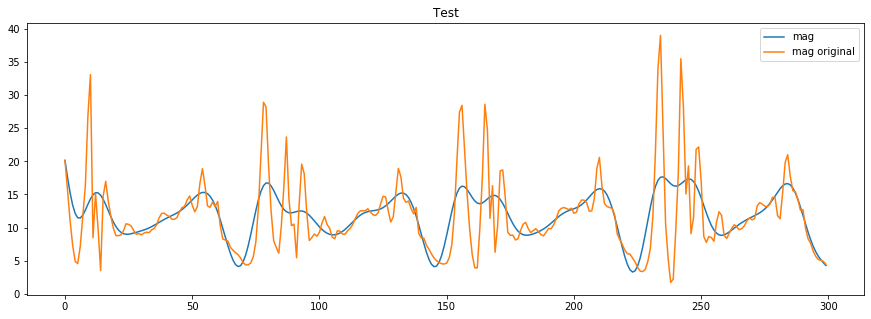

In [16]:
data_length = 300
display_multiple_signals_plot([low_pass_filter(magnitude(z_data, z_data.shape[0]), data_length), magnitude(z_data, z_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

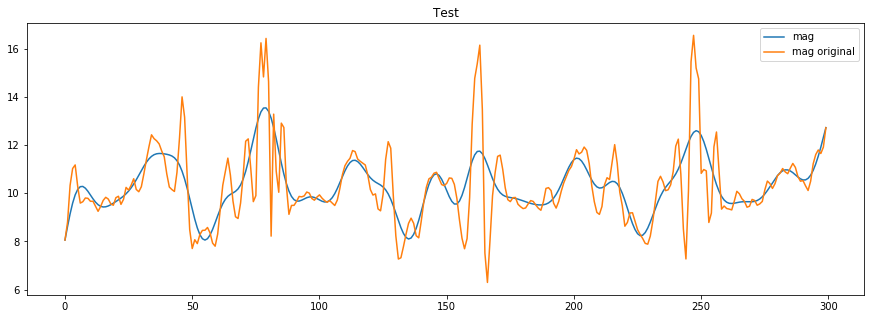

In [17]:
data_length = 300
display_multiple_signals_plot([low_pass_filter(magnitude(x_data, x_data.shape[0]), data_length), magnitude(x_data, x_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

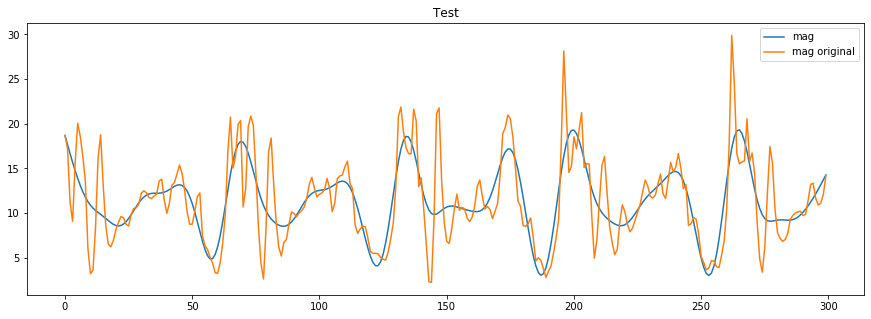

In [18]:
data_length = 300
display_multiple_signals_plot([low_pass_filter(magnitude(t_data, t_data.shape[0]), data_length), magnitude(t_data, t_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

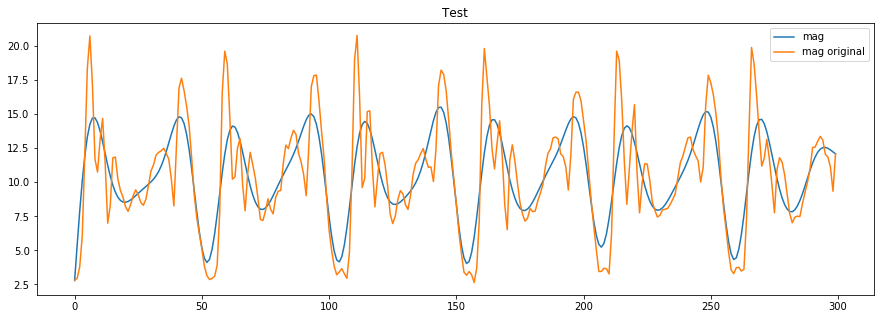

In [19]:
data_length = 300
display_multiple_signals_plot([low_pass_filter(magnitude(z_fax_data, z_fax_data.shape[0]), data_length), magnitude(z_fax_data, z_fax_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

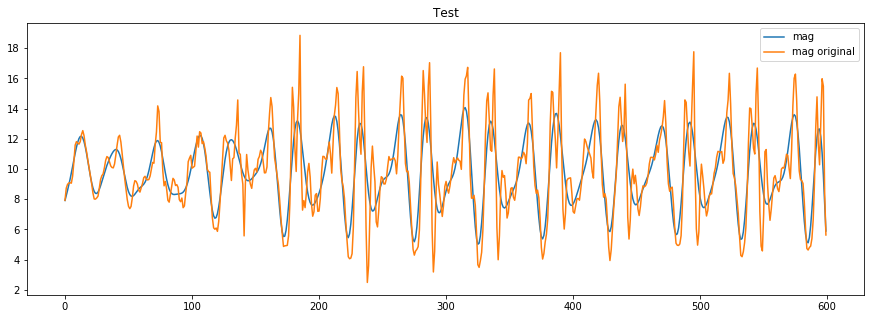

In [49]:
data_length = 600
display_multiple_signals_plot([low_pass_filter(magnitude(tilen_fix_data, tilen_fix_data.shape[0]), data_length), magnitude(tilen_fix_data, tilen_fix_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

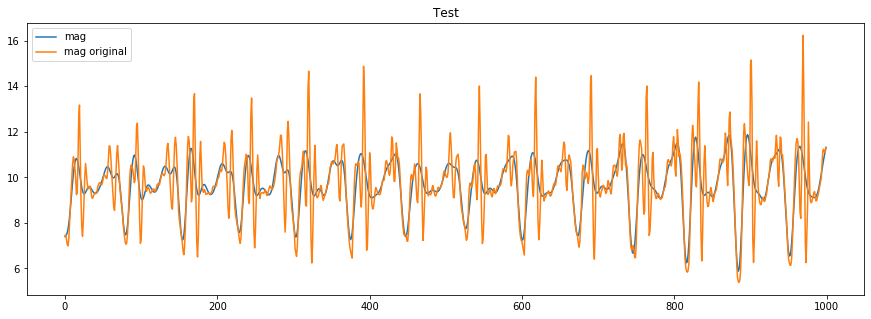

In [51]:
data_length = 1000
display_multiple_signals_plot([low_pass_filter(magnitude(simon_data, simon_data.shape[0]), data_length), magnitude(simon_data, simon_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

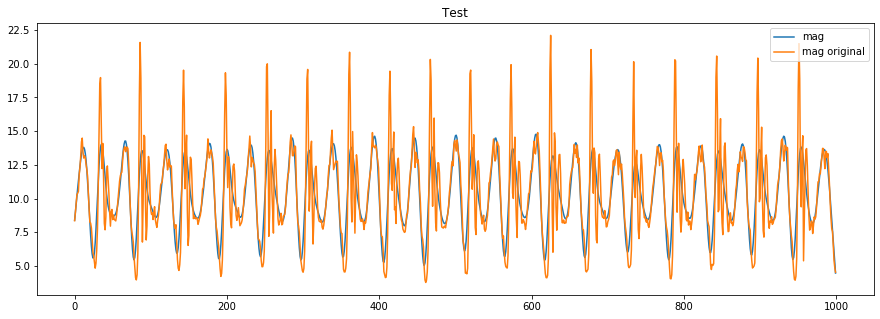

In [16]:
data_length = 1000
display_multiple_signals_plot([low_pass_filter(magnitude(andrej_data, andrej_data.shape[0]), data_length), magnitude(andrej_data, andrej_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

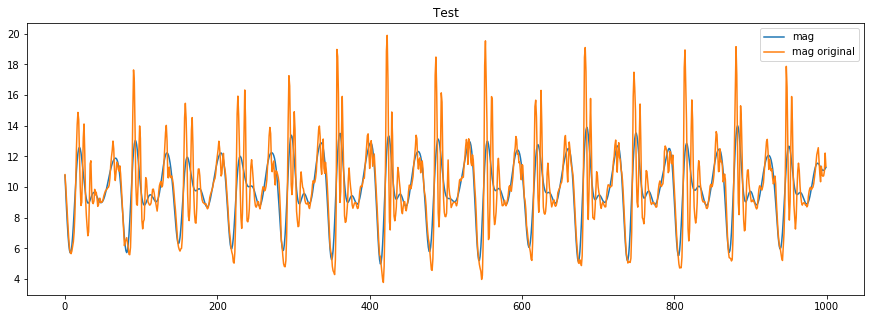

In [46]:
data_length = 1000
display_multiple_signals_plot([low_pass_filter(magnitude(anze_data, anze_data.shape[0]), data_length), magnitude(anze_data, anze_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

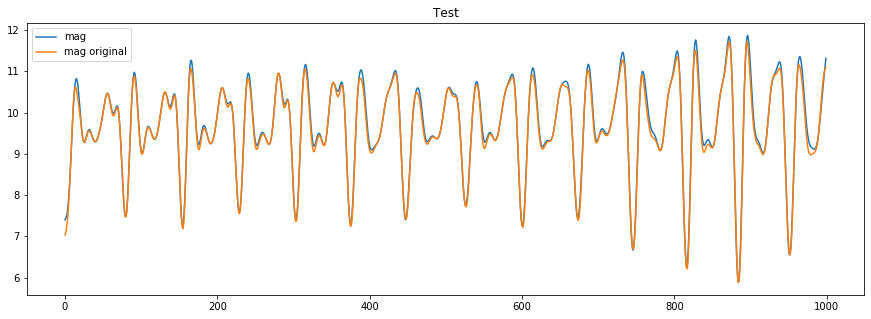

In [47]:
data_length = 1000
display_multiple_signals_plot([low_pass_filter(magnitude(simon_data, simon_data.shape[0]), data_length), low_pass_magnitude(simon_data, simon_data.shape[0])], ["mag", "mag original"], data_length, "Test")
#simple_one_signal_plot(low_pass_filter(magnitude(data, data.shape[0]), data_length), data_length, "Low pass magnitude", "low pass")

# Find cycles

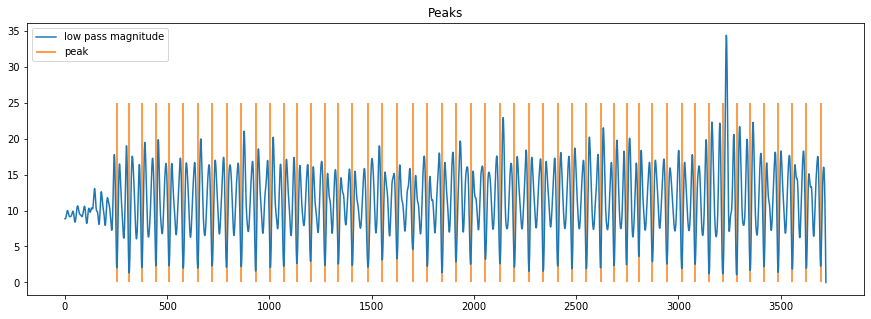

In [29]:
data_length = data.shape[0]
low_pass_magnitude = low_pass_filter(magnitude(data, data.shape[0]), data_length)
peaks = find_peaks_in_signal(data, data_length)
display_signal_with_peaks(low_pass_magnitude, peaks[0], data_length, "low pass magnitude", "Peaks")

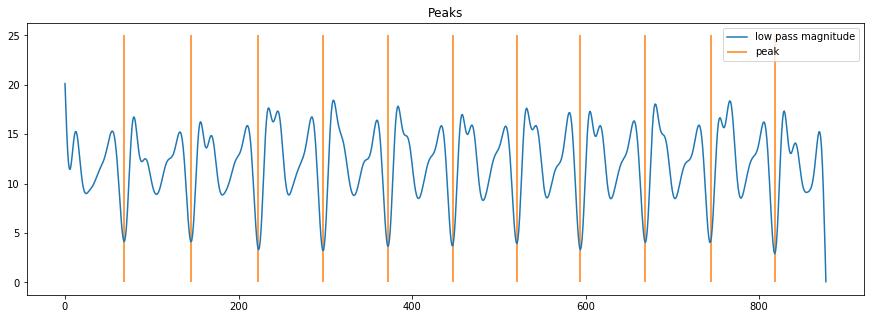

In [30]:
data_length = z_data.shape[0]
z_low_pass_magnitude = low_pass_filter(magnitude(z_data, z_data.shape[0]), data_length)
z_peaks = find_peaks_in_signal(z_data, data_length)
display_signal_with_peaks(z_low_pass_magnitude, z_peaks[0], data_length, "low pass magnitude", "Peaks")

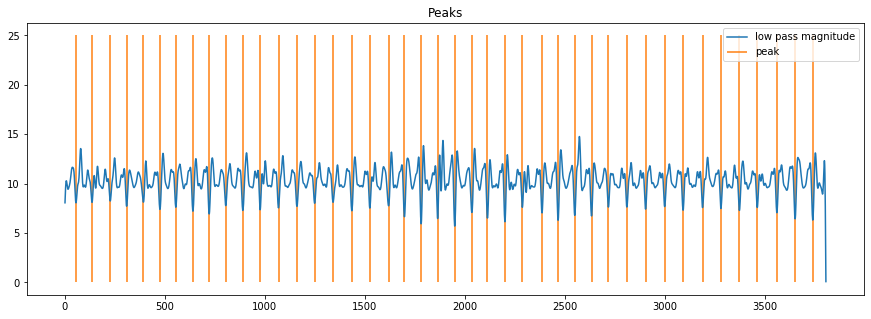

In [31]:
data_length = x_data.shape[0]
x_low_pass_magnitude = low_pass_filter(magnitude(x_data, x_data.shape[0]), data_length)
x_peaks = find_peaks_in_signal(x_data, data_length)
display_signal_with_peaks(x_low_pass_magnitude, x_peaks[0], data_length, "low pass magnitude", "Peaks")

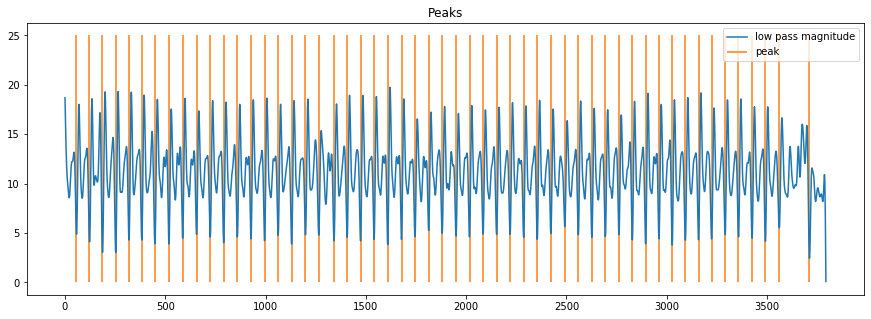

In [32]:
data_length = t_data.shape[0]
t_low_pass_magnitude = low_pass_filter(magnitude(t_data, t_data.shape[0]), data_length)
t_peaks = find_peaks_in_signal(t_data, data_length)
display_signal_with_peaks(t_low_pass_magnitude, t_peaks[0], data_length, "low pass magnitude", "Peaks")

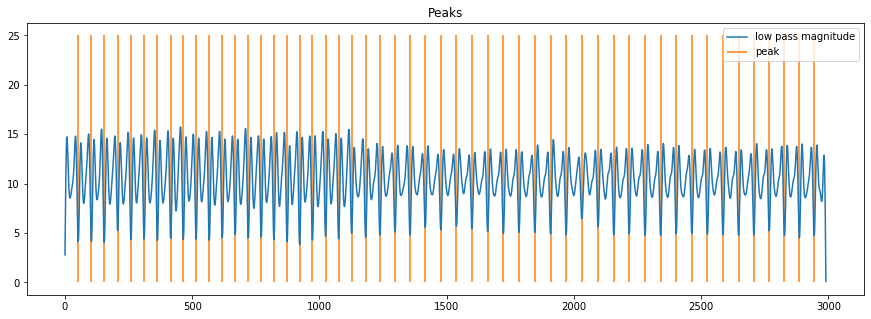

In [33]:
data_length = z_fax_data.shape[0]
z_fax_low_pass_magnitude = low_pass_filter(magnitude(z_fax_data, z_fax_data.shape[0]), data_length)
z_fax_peaks = find_peaks_in_signal(z_fax_data, data_length)
display_signal_with_peaks(z_fax_low_pass_magnitude, z_fax_peaks[0], data_length, "low pass magnitude", "Peaks")

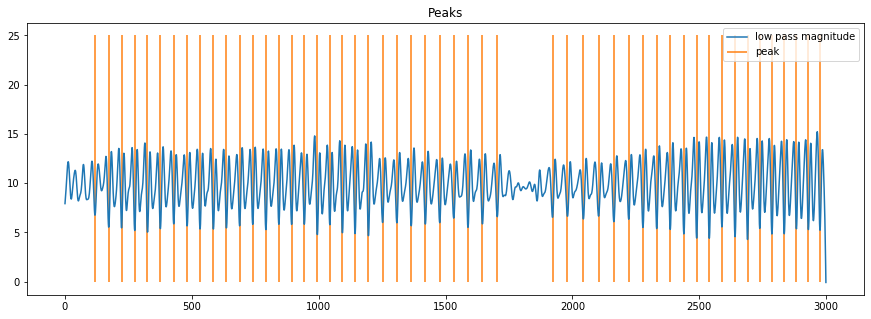

In [34]:
data_length = tilen_fix_data.shape[0]
t_fix_low_pass_magnitude = low_pass_filter(magnitude(tilen_fix_data, tilen_fix_data.shape[0]), data_length)
t_fix_peaks = find_peaks_in_signal(tilen_fix_data, data_length)
display_signal_with_peaks(t_fix_low_pass_magnitude, t_fix_peaks[0], data_length, "low pass magnitude", "Peaks")

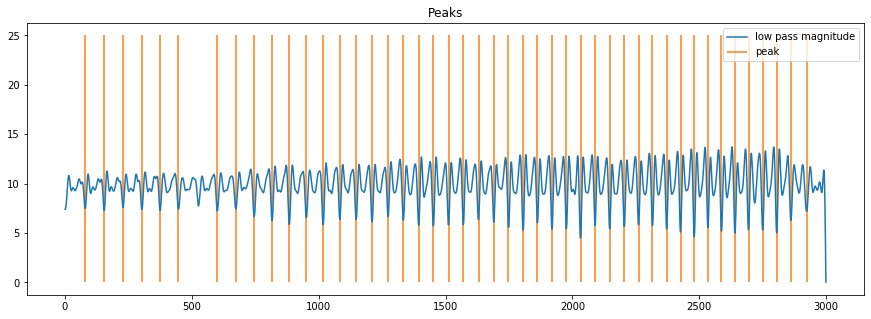

In [35]:
data_length = simon_data.shape[0]
simon_data_low_pass_magnitude = low_pass_filter(magnitude(simon_data, simon_data.shape[0]), data_length)
simon_peaks = find_peaks_in_signal(simon_data, data_length)
display_signal_with_peaks(simon_data_low_pass_magnitude, simon_peaks[0], data_length, "low pass magnitude", "Peaks")

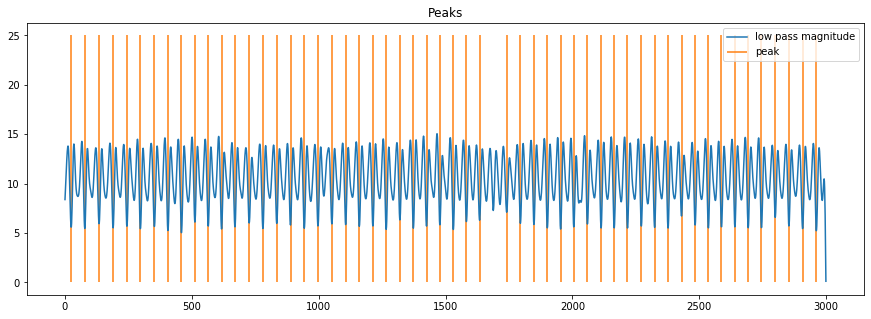

In [40]:
data_length = andrej_data.shape[0]
andrej_low_pass_magnitude = low_pass_filter(magnitude(andrej_data, andrej_data.shape[0]), data_length)
andrej_peaks = find_peaks_in_signal(andrej_data, data_length)
display_signal_with_peaks(andrej_low_pass_magnitude, andrej_peaks[0], data_length, "low pass magnitude", "Peaks")

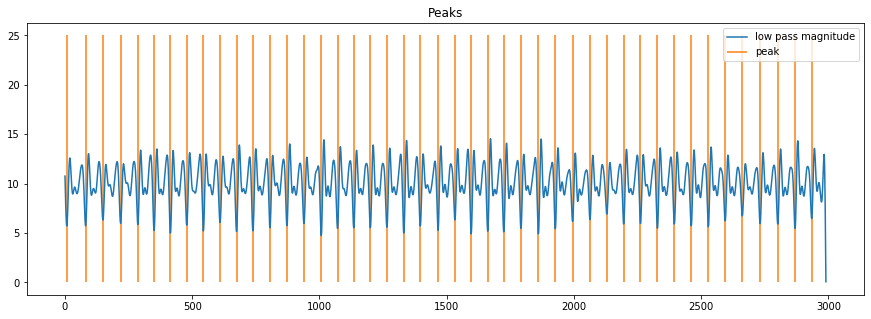

In [44]:
data_length = anze_data.shape[0]
anze_data_low_pass_magnitude = low_pass_filter(magnitude(anze_data, anze_data.shape[0]), data_length)
anze_peaks = find_peaks_in_signal(anze_data, data_length)
display_signal_with_peaks(anze_data_low_pass_magnitude, anze_peaks[0], data_length, "low pass magnitude", "Peaks")

# Time domain analysis

Time domain anlysis missing: correlation, 

In [14]:
def avg_length_calculate(peaks):
    sum_diff = 0
    for i in range(1, len(peaks)):
        sum_diff += peaks[i] - peaks[i -1]
    return sum_diff / (len(peaks) - 1)

def avg_max_accelration(peaks, data):
    max_acc = 0
    for cycle_index in range(1, len(peaks)):
        if peaks[cycle_index] > len(data):
            break
        max_acc += np.amax(data[peaks[cycle_index - 1] : peaks[cycle_index]])
    return max_acc / (len(peaks) - 1)

def avg_min_accelration(peaks, data):
    min_acc = 0
    for cycle_index in range(1, len(peaks)):
        if peaks[cycle_index] > len(data):
            break
        min_acc += np.amin(data[peaks[cycle_index - 1] : peaks[cycle_index]])
    return min_acc / (len(peaks) - 1)

#The RMS is an indicator of the gait stability: the higher the RMS value, the lower the degree of stability is
def root_mean_square(data):
    sum_value = 0
    for index in range(1, len(data)):
        sum_value += data[index] * data[index]
    return sum_value / len(data)

def average_cycle_frequency(peaks):
    return 1 / avg_length_calculate(peaks)
    
def calculate_variance(data):
    return np.var(data)

def calculate_std(data):
    return np.std(data)

def calculate_mean(data):
    return np.mean(data)

from scipy.spatial.distance import euclidean
def calculate_dynamic_time_warping(data, second_data):
    distance, path = fastdtw(data, second_data, dist=euclidean)
    return distance

In [15]:
def get_features(data, peaks, data_name, data_length):
    low_pass_filtered_data = low_pass_filter(magnitude(data, data_length), data_length)
    display_signal_with_peaks(low_pass_filtered_data, peaks[0], data_length, "low pass magnitude", "Peaks")
    
    print(data_name)
    print("avg_length_calculate mag: " + str(avg_length_calculate(peaks[0])))
    print("average_cycle_frequency: " + str(average_cycle_frequency(peaks[0])))
    print("avg_max_accelration mag: " + str(avg_max_accelration(peaks[0], low_pass_filtered_data)))
    print("avg_min_accelration mag: " + str(avg_min_accelration(peaks[0], low_pass_filtered_data)))
    print("calculate_variance: " + str(calculate_variance(low_pass_filtered_data)))
    print("calculate_std: " + str(calculate_std(low_pass_filtered_data)))
    print("calculate_mean: " + str(calculate_mean(low_pass_filtered_data)))
    
    print("avg_max_accelration accX: " + str(avg_max_accelration(peaks[0], data["accX"][:data_length])))
    print("avg_min_accelration accX: " + str(avg_min_accelration(peaks[0], data["accX"][:data_length])))
    print("root_mean_square accX: " + str(root_mean_square(data["accX"][:data_length])))
    print("calculate_variance accX: " + str(calculate_variance(data["accX"][:data_length])))
    print("calculate_std accX: " + str(calculate_std(data["accX"][:data_length])))
    print("calculate_mean accX: " + str(calculate_mean(data["accX"][:data_length])))
    
    print("avg_max_accelration accY: " + str(avg_max_accelration(peaks[0], data["accY"][:data_length])))
    print("avg_min_accelration accY: " + str(avg_min_accelration(peaks[0], data["accY"][:data_length])))
    print("root_mean_square accY: " + str(root_mean_square(data["accY"][:data_length])))
    print("calculate_variance accY: " + str(calculate_variance(data["accY"][:data_length])))
    print("calculate_std accY: " + str(calculate_std(data["accY"][:data_length])))
    print("calculate_mean accY: " + str(calculate_mean(data["accY"][:data_length])))
    
    print("avg_max_accelration accZ: " + str(avg_max_accelration(peaks[0], data["accZ"][:data_length])))
    print("avg_min_accelration accZ: " + str(avg_min_accelration(peaks[0], data["accZ"][:data_length])))
    print("root_mean_square accZ: " + str(root_mean_square(data["accZ"][:data_length])))
    print("calculate_variance accZ: " + str(calculate_variance(data["accZ"][:data_length])))
    print("calculate_std accZ: " + str(calculate_std(data["accZ"][:data_length])))
    print("calculate_mean accZ: " + str(calculate_mean(data["accZ"][:data_length])))
    print()
    print()

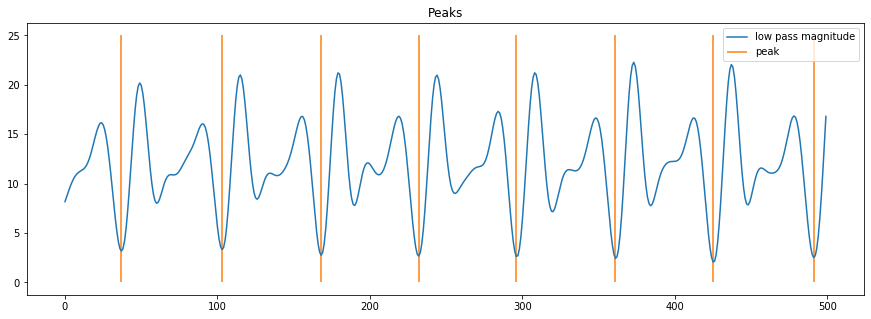

Tilen fri data
avg_length_calculate mag: 65.0
average_cycle_frequency: 0.015384615384615385
avg_max_accelration mag: 12.407078366201537
avg_min_accelration mag: 1.566587944945069
calculate_variance: 20.176082240892132
calculate_std: 4.491779406971377
calculate_mean: 11.835691516247492
avg_max_accelration accX: 6.6973787499999995
avg_min_accelration accX: -1.6360372500000002
root_mean_square accX: 25.53483733749362
calculate_variance accX: 10.977314491660152
calculate_std accX: 3.313203056207113
calculate_mean accX: 3.8241337480000004
avg_max_accelration accY: -0.7278391666666666
avg_min_accelration accY: -13.554373416666664
root_mean_square accY: 112.96624574964974
calculate_variance accY: 23.7134471018982
calculate_std accY: 4.869645480104091
calculate_mean accY: -9.462575042000001
avg_max_accelration accZ: 8.183383916666665
avg_min_accelration accZ: -14.507245
root_mean_square accZ: 37.546473683039444
calculate_variance accZ: 35.51867704855081
calculate_std accZ: 5.959754780907585
ca

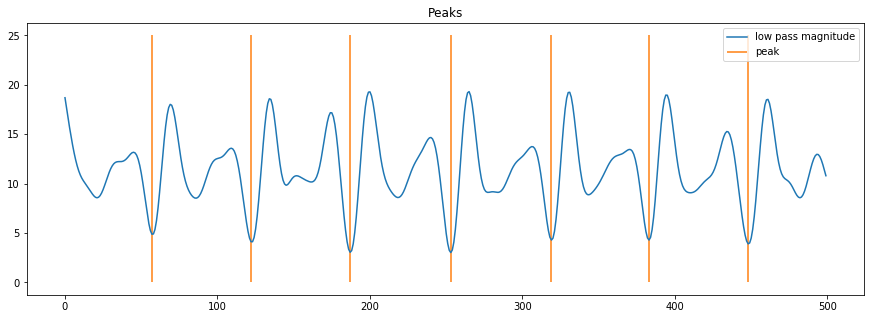

Tilen 2 fri data
avg_length_calculate mag: 67.0
average_cycle_frequency: 0.014925373134328358
avg_max_accelration mag: 8.722141227356078
avg_min_accelration mag: 1.7238098396143366
calculate_variance: 12.648772999163324
calculate_std: 3.55651135231751
calculate_mean: 11.382344009476927
avg_max_accelration accX: 2.503229
avg_min_accelration accX: -3.2679009999999997
root_mean_square accX: 8.371525585399091
calculate_variance accX: 8.016848418267488
calculate_std accX: 2.8314039659270605
calculate_mean accX: -0.59977645
avg_max_accelration accY: -0.7042635384615383
avg_min_accelration accY: -10.625834615384615
root_mean_square accY: 119.53908345871022
calculate_variance accY: 20.857988319730996
calculate_std accY: 4.56705466572615
calculate_mean accY: -9.945245858
avg_max_accelration accZ: 7.452229384615385
avg_min_accelration accZ: -6.294173000000001
root_mean_square accZ: 24.257004490120824
calculate_variance accZ: 24.196379281555405
calculate_std accZ: 4.918981528889431
calculate_mean

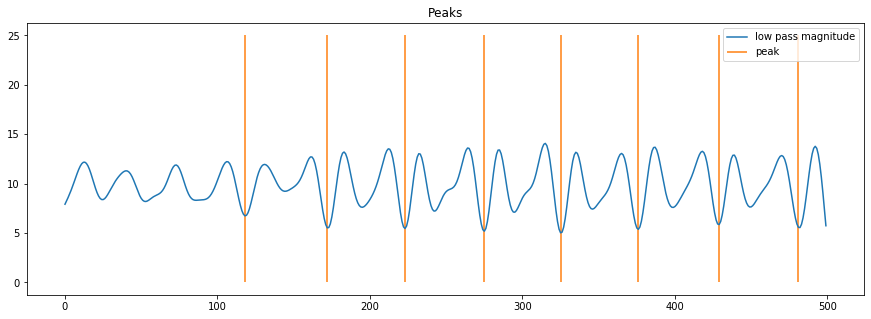

Tilen fax after fix
avg_length_calculate mag: 51.588235294117645
average_cycle_frequency: 0.019384264538198404
avg_max_accelration mag: 5.50701297141858
avg_min_accelration mag: 2.2445369594433693
calculate_variance: 4.511727495528715
calculate_std: 2.1240827421568858
calculate_mean: 9.828180792452535
avg_max_accelration accX: 1.3790601764705883
avg_min_accelration accX: -3.6059494705882353
root_mean_square accX: 19.15267511923213
calculate_variance accX: 8.89976706571389
calculate_std accX: 2.983247737904764
calculate_mean accX: -3.202024526
avg_max_accelration accY: -1.502995294117647
avg_min_accelration accY: -6.697004529411764
root_mean_square accY: 73.96871361627366
calculate_variance accY: 13.844494758069324
calculate_std accY: 3.720819097734976
calculate_mean accY: -7.75820948
avg_max_accelration accZ: 2.661788882352941
avg_min_accelration accZ: -1.574539705882353
root_mean_square accZ: 11.494983696761976
calculate_variance accZ: 9.439985515969434
calculate_std accZ: 3.072455942

In [69]:
data_length = 500
get_features(data, peaks, "Tilen fri data", data_length)
get_features(t_data, t_peaks, "Tilen 2 fri data", data_length)
get_features(tilen_fix_data, t_fix_peaks, "Tilen fax after fix", data_length)

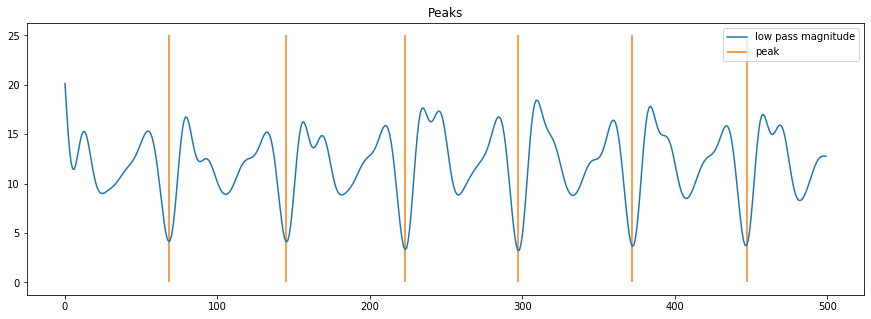

Ziga data
avg_length_calculate mag: 75.0
average_cycle_frequency: 0.013333333333333334
avg_max_accelration mag: 8.690711798547698
avg_min_accelration mag: 1.7982285774684215
calculate_variance: 11.839918192444502
calculate_std: 3.4409182193775694
calculate_mean: 11.974527335389608
avg_max_accelration accX: 6.811026000000001
avg_min_accelration accX: -8.0655854
root_mean_square accX: 20.6412262325304
calculate_variance accX: 20.41415683156356
calculate_std accX: 4.5182028320520935
calculate_mean accX: -0.47658034999999993
avg_max_accelration accY: 2.1930862
avg_min_accelration accY: -13.532029699999999
root_mean_square accY: 132.62582946329076
calculate_variance accY: 29.933122900604992
calculate_std accY: 5.471117152886144
calculate_mean accY: -10.148466061999999
avg_max_accelration accZ: 4.271257
avg_min_accelration accZ: -9.287588500000002
root_mean_square accZ: 24.399072280313835
calculate_variance accZ: 23.50474906252824
calculate_std accZ: 4.848169661070891
calculate_mean accZ: -0

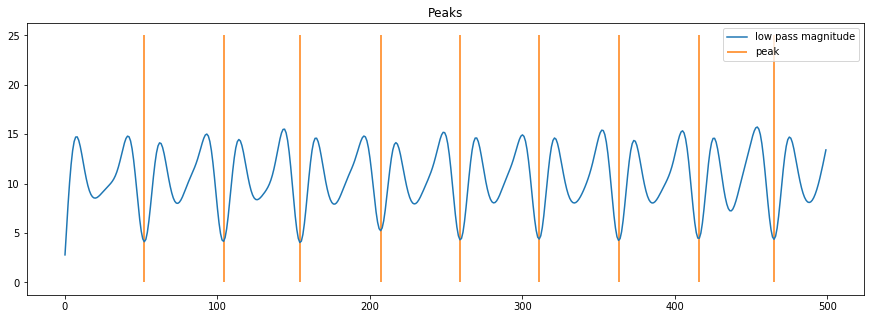

Ziga fax after fix
avg_length_calculate mag: 51.111111111111114
average_cycle_frequency: 0.019565217391304346
avg_max_accelration mag: 6.774039540353649
avg_min_accelration mag: 1.9147595694450632
calculate_variance: 9.117275344129949
calculate_std: 3.0194826285524394
calculate_mean: 10.528604486852798
avg_max_accelration accX: 2.7384346666666666
avg_min_accelration accX: -2.1095577777777783
root_mean_square accX: 7.311850275935033
calculate_variance accX: 6.427683520874239
calculate_std accX: 2.535287660379831
calculate_mean accX: 0.941438414
avg_max_accelration accY: 7.580042666666667
avg_min_accelration accY: 0.5480061666666667
root_mean_square accY: 106.61145294633626
calculate_variance accY: 15.456023342747265
calculate_std accY: 3.9314149288452453
calculate_mean accY: 9.566157382000002
avg_max_accelration accZ: 5.074111555555556
avg_min_accelration accZ: -2.740562888888889
root_mean_square accZ: 13.509412543758035
calculate_variance accZ: 13.142829381959086
calculate_std accZ: 3.

In [67]:
get_features(z_data, z_peaks, "Ziga data", data_length)
get_features(z_fax_data, z_fax_peaks, "Ziga fax after fix", data_length)

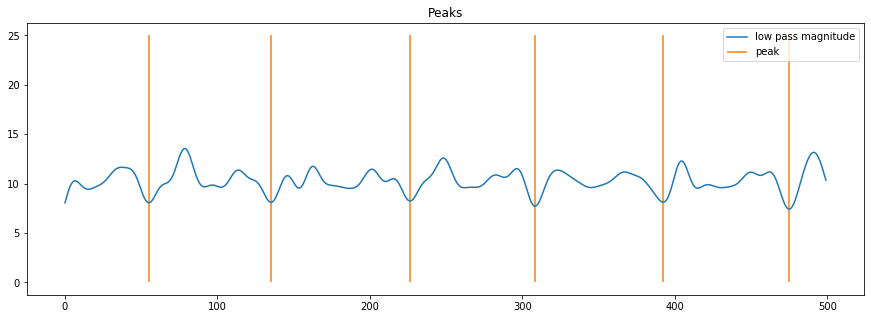

n5_r_u0_0-fri data
avg_length_calculate mag: 83.72727272727273
average_cycle_frequency: 0.011943539630836046
avg_max_accelration mag: 5.594650001875319
avg_min_accelration mag: 3.5595064822734757
calculate_variance: 1.2353731944439381
calculate_std: 1.11147343398029
calculate_mean: 10.261803430849142
avg_max_accelration accX: 1.5166168181818185
avg_min_accelration accX: -2.557877909090909
root_mean_square accX: 2.9621633624959633
calculate_variance accX: 2.8925407324957018
calculate_std accX: 1.700747110094767
calculate_mean accX: -0.34694871
avg_max_accelration accY: -2.437733090909091
avg_min_accelration accY: -6.998034363636363
root_mean_square accY: 98.38009673754573
calculate_variance accY: 2.6747978327463118
calculate_std accY: 1.6354809178789924
calculate_mean accY: -9.790944078
avg_max_accelration accZ: 2.7441904545454547
avg_min_accelration accZ: -3.3867062727272734
root_mean_square accZ: 6.345724979999186
calculate_variance accZ: 4.874944387189428
calculate_std accZ: 2.207927

In [70]:
get_features(x_data, x_peaks, "n5_r_u0_0-fri data", data_length)

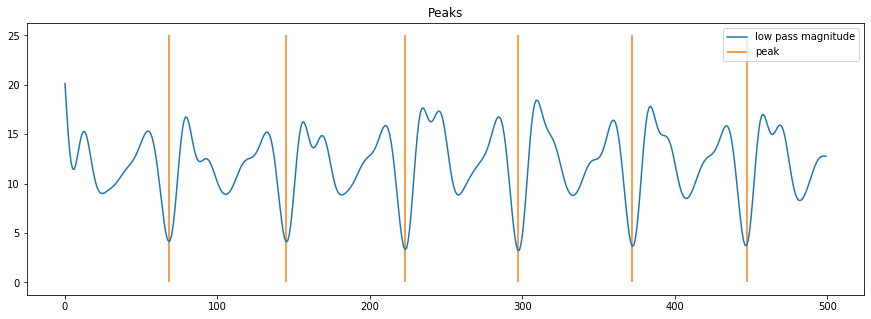

Ziga data
avg_length_calculate mag: 75.0
average_cycle_frequency: 0.013333333333333334
avg_max_accelration mag: 8.690711798547698
avg_min_accelration mag: 1.7982285774684215
calculate_variance: 11.839918192444502
calculate_std: 3.4409182193775694
calculate_mean: 11.974527335389608
avg_max_accelration accX: 6.811026000000001
avg_min_accelration accX: -8.0655854
root_mean_square accX: 20.6412262325304
calculate_variance accX: 20.41415683156356
calculate_std accX: 4.5182028320520935
calculate_mean accX: -0.47658034999999993
avg_max_accelration accY: 2.1930862
avg_min_accelration accY: -13.532029699999999
root_mean_square accY: 132.62582946329076
calculate_variance accY: 29.933122900604992
calculate_std accY: 5.471117152886144
calculate_mean accY: -10.148466061999999
avg_max_accelration accZ: 4.271257
avg_min_accelration accZ: -9.287588500000002
root_mean_square accZ: 24.399072280313835
calculate_variance accZ: 23.50474906252824
calculate_std accZ: 4.848169661070891
calculate_mean accZ: -0

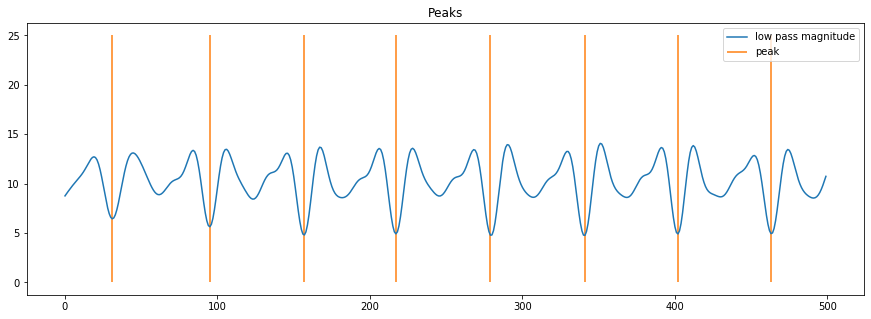

Ziga data slow
avg_length_calculate mag: 61.714285714285715
average_cycle_frequency: 0.016203703703703703
avg_max_accelration mag: 13.707071340538507
avg_min_accelration mag: 4.975782112175261
calculate_variance: 4.900274617790537
calculate_std: 2.21365639108479
calculate_mean: 10.207638540350173
avg_max_accelration accX: 6.755753142857143
avg_min_accelration accX: -6.231765
root_mean_square accX: 6.204220602011446
calculate_variance accX: 5.967950969699047
calculate_std accX: 2.442939002451565
calculate_mean accX: 0.487670162
avg_max_accelration accY: 15.462438714285714
avg_min_accelration accY: 3.6227691428571434
root_mean_square accY: 98.38626586510517
calculate_variance accY: 7.569663533577399
calculate_std accY: 2.7513021523593877
calculate_mean accY: 9.541774808
avg_max_accelration accZ: 9.950302142857144
avg_min_accelration accZ: -5.969086714285715
root_mean_square accZ: 8.238574916286922
calculate_variance accZ: 7.916719357472819
calculate_std accZ: 2.8136665327420767
calculate

In [75]:
z_temp = z_fax_data[2000:2500]
z_temp = z_temp.reset_index(drop=True)
z_temp.index = z_temp.index + 1
z_temp_fax_peaks = find_peaks_in_signal(z_temp, data_length)


get_features(z_data, z_peaks, "Ziga data", data_length)
get_features(z_temp, z_temp_fax_peaks, "Ziga data slow", data_length)